# Gather Data
Gather data from three sources:
1. Manually download WeRateDogs Twitter archive
2. Programmatically download tweet image predictions file 
3. Query Twitter API for each tweet's JSON data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import requests
from tweepy import OAuthHandler
from collections import Counter
import json
import re
import csv
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

# display all the columns
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 40) 
pd.set_option('display.max_colwidth', 500)

## 1. Manually download twitter-archive-enhanced.csv

In [2]:
#Load WeRateDogs Twitter archive
archive = pd.read_csv('twitter-archive-enhanced.csv')

## 2. Programmatically download tweet image predictions with provided url

In [3]:
# download file using requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
response

<Response [200]>

In [4]:
# read file with pandas
with open('image-predictions.tsv', 'wb') as file: file.write(response.content)
    
image = pd.read_csv('image-predictions.tsv', delimiter = '\t')

## 3. Query Twitter API

In [5]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#   consumer_key = 'HIDDEN'
#   consumer_secret = 'HIDDEN'
#   access_token = 'HIDDEN'
#   access_secret = 'HIDDEN'
#   auth = OAuthHandler(consumer_key, consumer_secret)
#   auth.set_access_token(access_token, access_secret)
#   api = tweepy.API(auth, wait_on_rate_limit=True)
# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#   tweet_ids = df_a.tweet_id.values
#   len(tweet_ids)
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#  count = 0
#  fails_dict = {}
#  start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#  with open('tweet_json.txt', 'w') as outfile:
#    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#   print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#   end = timer()
#   print(end - start)
#   print(fails_dict)

In [6]:
# read tweet-json.txt with json
tweets = []
with open('tweet-json.txt', encoding='utf-8') as file:
    for i in file:
        tweet = json.loads(i)
        tweets.append(tweet)

# read txt file with pandas 
tweets = pd.DataFrame(tweets, columns = list(tweets[0].keys())) 
# create columns: id, retweet_count, favorite_count
tweets = tweets[['id', 'retweet_count', 'favorite_count']]

# Assess data visually and prgrammatically

## 1. Assess archive data

In [7]:
# Display archive table
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

#### archive columns:
 - **tweet_id**: the twitter user id
 - **in_reply_to_status_id**: the original Tweet’s ID if the represented Tweet is a reply
 - **in_reply_to_user_id**: original Tweet’s author ID if the represented Tweet is a reply
 - **timestamp**: date and time of the post
 - **source**: utility used to post the Tweet, such as through Twitter website or Twitter app for iPhone
 - **text**: the actual UTF-8 text of the status update
 - **retweeted_status_id**: the Tweet’s ID if the represented Tweet is a retweet
 - **retweeted_status_user_id**: the Tweet’s author ID if the represented Tweet is a retweet
 - **retweeted_status_timestamp**: date and time of the retweet
 - **expanded_urls**: an expanded version of display_url. Links to the media display page.
 - **rating_numerator**: actual rating number the dog received
 - **rating_denominator**: the highest rating the dog can recieve
 - **name**: name of the dog 
 - **doggo**: dog of medium to large size
 - **floofer**: a very fluffy dog
 - **pupper**: dog of small size
 - **puppo**: a puppy

In [8]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
sum(archive.duplicated())

0

## 2. Assess image data

In [10]:
# Display impage prediction file
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### image columns:
 - **tweet_id**: last part of the tweet URL after "status/"
 - **jpg_url**: web address to where the image is located
 - **img_num**: which image was chosen for the prediction
 - **p1**: algorithm 1 prediction for the image
 - **p1_conf**: how confident the algorithm 1 is in its prediction
 - **p1_dog**: whether or not the prediction is a breed of dog
 - **p2**: algorithm 2 prediction for the image
 - **p2_conf**: how confident the algorithm 2 is in its prediction
 - **p2_dog**: whether or not the prediction is a breed of dog
 - **p3**: algorithm 3 prediction for the image
 - **p3_conf**: how confident the algorithm 3 is in its prediction
 - **p3_dog**: whether or not the prediction is a breed of dog

In [11]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
sum(image.duplicated())

0

## 3. Assess tweets data

In [13]:
# Display Twitter API table
tweets

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


#### tweets columns:
 - **id**: twitter user id
 - **retweet_count**: number of times the Tweet has been retweeted
 - **favorite_count**: number of times this Tweet has been liked by Twitter users

In [14]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [15]:
sum(tweets.duplicated())

0

In [16]:
tweets.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality Issues

#### `archive`:
 - There are 181 retweets and 78 replies
 - Erroneous datatypes(timestamp, retweet_status_timestamp, tweet_id)
 - Erroneous names in the name column
 - Ratings are extracted incorrectly
 - Source column contains extra characters that are not needed
 
#### `image`:
 - tweet_id is int not string
 - some images are not dogs
 - column names are not clear (p1, p1_conf, p1_dog)
 - inconsistent displays for image prediction output
 
 
#### `tweets`:
 - id is int not string

### Tidiness Issues
 - in `archive`, the variables for the dog stages are spread across four columns
 - all three tables should be merged into one

# Clean 

In [17]:
# create copies of dataframe for cleaning
archive_clean = archive.copy()
image_clean = image.copy()
tweets_clean = tweets.copy()

###  Tidiness

#### Four variables for dog stages are spread across four columns

#### Define
Combine all four columns to create one column for dog stage

#### Code

In [18]:
# replace 'None' with null values for dog stages
archive_clean.doggo.replace('None', '', inplace = True)
archive_clean.floofer.replace('None', '', inplace = True)
archive_clean.pupper.replace('None', '', inplace = True)
archive_clean.puppo.replace('None', '', inplace = True)

In [19]:
# combine all four stages into one column
archive_clean['dog_stages'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

In [20]:
archive_clean.dog_stages.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stages, dtype: int64

In [21]:
# separate those with multiple values
archive_clean.loc[archive_clean.dog_stages == 'doggopupper', 'dog_stages'] = 'doggo, pupper'
archive_clean.loc[archive_clean.dog_stages == 'doggofloofer', 'dog_stages'] = 'doggo, floofer'
archive_clean.loc[archive_clean.dog_stages == 'doggopuppo', 'dog_stages'] = 'doggo, puppo'
archive_clean.loc[archive_clean.dog_stages == '', 'dog_stages'] = np.nan

In [22]:
# remove the the individual dog stage columns
archive_clean.drop(['doggo', 'puppo', 'floofer', 'pupper'], axis = 1, inplace = True)

#### Test

In [23]:
archive_clean.dog_stages.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stages, dtype: int64

#### All three tables should be merged into one

#### Define
Merge `image_clean` and `tweets_clean` with `archive_clean`, joinging on twitter_id and id

#### Code

In [24]:
# merge image_clean with archive_clean
archive_clean = pd.merge(archive_clean, image_clean, on = ['tweet_id'], how = 'left')

In [25]:
# rename id column in `tweets_clean` to tweet_id
tweets_clean.rename(columns = {'id':'tweet_id'}, inplace = True)
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [26]:
# merge tweets_clean with archive_clean
archive_clean = pd.merge(archive_clean, tweets_clean, on = ['tweet_id'], how = 'left')

####  Test

In [27]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stages                    380 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                            2075 non-null object
p1_conf                       20

### Quality

#### There are 181 retweets and 78 replies

#### Define
Remove rows that are retweets and replies, then drop the empty columns

#### Code

In [28]:
# keep rows that have null values in retweeted columns
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_user_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_timestamp.isnull()]
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isnull()]
archive_clean = archive_clean[archive_clean.in_reply_to_user_id.isnull()]                              
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
dog_stages                    336 non-null object
jpg_url                       1971 non-null object
img_num                       1971 non-null float64
p1                            1971 non-null object
p1_conf                       1971 non-n

In [29]:
# drop the retweeted columns
archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 
                    'in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1, inplace = True)

#### Test

In [30]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stages            336 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null object
retweet_count         2097 non-nu

#### Erroneous datatype for timestamp, retweeted_status_timestamp, tweet_id, and dog_stages. Tweet_id from `image` and id from `tweets` do not need to be converted as they have been merged with tweet_id from `archive`.

#### Define

Convert timestamp from object to datetime and tweet_id from int to object. Convert dog_stages to category. Retweeted_status_timestamp column was removed so no need to convert its datatype.

#### Code

In [31]:
# to datetime
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

# to object
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('object')

# to category
archive_clean['dog_stages'] = archive_clean['dog_stages'].astype('category')

#### Test

In [32]:
# check timestamp datatype
archive_clean.timestamp.dtypes

dtype('<M8[ns]')

In [33]:
# check tweet_id datatype
archive_clean.tweet_id.dtypes

dtype('O')

In [34]:
# check dog_stages datatype
archive_clean.dog_stages.dtypes

CategoricalDtype(categories=['doggo', 'doggo, floofer', 'doggo, pupper', 'doggo, puppo', 'floofer', 'pupper', 'puppo'], ordered=False)

#### None and other erroneous data found in the name column

#### Define

Replace 'None' and lower case entries with NaN in name

#### Code

In [35]:
# convert None to null values
archive_clean.name.replace('None', '', inplace = True)

In [36]:
# convert all entries that are lower case to null values
mask = archive_clean.name.str.islower()
column_name = 'name'
archive_clean.loc[mask, column_name] = np.nan

In [37]:
# replace the empty values with NaN
archive_clean.loc[archive_clean.name == '', 'name'] = np.nan

#### Test

In [38]:
archive_clean.name.value_counts()

Charlie       11
Lucy          11
Cooper        10
Oliver        10
Tucker         9
Penny          9
Winston        8
Lola           8
Sadie          8
Daisy          7
Toby           7
Koda           6
Jax            6
Oscar          6
Bella          6
Stanley        6
Bo             6
Bailey         6
Louis          5
Rusty          5
Milo           5
Leo            5
Bentley        5
Scout          5
Chester        5
Buddy          5
Dave           5
Reggie         4
Cassie         4
Jerry          4
              ..
Danny          1
Dallas         1
Chaz           1
Ricky          1
Tom            1
Reptar         1
Dixie          1
Biden          1
JD             1
Shadoe         1
Dudley         1
Arlen          1
Snoop          1
Margo          1
Dale           1
Freddery       1
Perry          1
Emanuel        1
Rhino          1
Longfellow     1
Bauer          1
Balto          1
Humphrey       1
Snoopy         1
Flurpson       1
Mack           1
Moreton        1
Tuck          

#### Ratings are extracted incorrectly

#### Define

Extract ratings from text column, convert to float, and remove rows that do not have 10 as the denominator

#### Code

In [39]:
# extract rating from text
rating = archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand = True)
rating.columns = ['rating_numerator', 'rating_denominator']

# update ratings and convert to float
archive_clean['rating_numerator'] = rating['rating_numerator'].astype('float')
archive_clean['rating_denominator'] = rating['rating_denominator'].astype('float')

In [40]:
# keep only rows that have 10.0 as the denominator
archive_clean = archive_clean[archive_clean.rating_denominator == 10.0]

#### Test

In [41]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2080 non-null object
timestamp             2080 non-null datetime64[ns]
source                2080 non-null object
text                  2080 non-null object
expanded_urls         2077 non-null object
rating_numerator      2080 non-null float64
rating_denominator    2080 non-null float64
name                  1387 non-null object
dog_stages            336 non-null category
jpg_url               1954 non-null object
img_num               1954 non-null float64
p1                    1954 non-null object
p1_conf               1954 non-null float64
p1_dog                1954 non-null object
p2                    1954 non-null object
p2_conf               1954 non-null float64
p2_dog                1954 non-null object
p3                    1954 non-null object
p3_conf               1954 non-null float64
p3_dog                1954 non-null object
retweet_count     

#### Source column contains extra characters that are not needed

#### Define

Remove tags to show more clarity of which utility was used to create the Tweet

#### Code

In [42]:
# use Regex to remove tags by creating a function
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

archive_clean['source'] = archive_clean['source'].apply(lambda x : remove_tags(x))

# change to category
archive_clean['source'] = archive_clean['source'].astype('category')

#### Test

In [43]:
# check categories
archive_clean.source.value_counts()

Twitter for iPhone     1947
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### Some images are not dogs

#### Define

Remove rows that do not show an image of a dog

#### Code

In [44]:
archive_clean = archive_clean[archive_clean.p1_dog == True]
archive_clean['p1_dog'] = archive_clean['p1_dog'].astype('bool')
archive_clean['p2_dog'] = archive_clean['p2_dog'].astype('bool')
archive_clean['p3_dog'] = archive_clean['p3_dog'].astype('bool')

#### Test

In [45]:
# check for first prediction that is not a dog
archive_clean[archive_clean.p1_dog == False]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


#### Column names are not clear (p1, p1_conf, p1_dog)

#### Define

Rename the columns for image prediction to clarify what they are

#### Code

In [46]:
# creat new column names
archive_clean.rename(columns = {'p1':'prediction_1', 'p1_conf':'pred1_confidence', 'p1_dog': 'is_dog1', 
                               'p2':'prediction_2', 'p2_conf':'pred2_confidence', 'p2_dog': 'is_dog2',
                               'p3':'prediction_3', 'p3_conf':'pred3_confidence', 'p3_dog': 'is_dog3'}, inplace = True)

#### Test

In [47]:
# check column names
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 1 to 2355
Data columns (total 22 columns):
tweet_id              1449 non-null object
timestamp             1449 non-null datetime64[ns]
source                1449 non-null category
text                  1449 non-null object
expanded_urls         1449 non-null object
rating_numerator      1449 non-null float64
rating_denominator    1449 non-null float64
name                  1042 non-null object
dog_stages            227 non-null category
jpg_url               1449 non-null object
img_num               1449 non-null float64
prediction_1          1449 non-null object
pred1_confidence      1449 non-null float64
is_dog1               1449 non-null bool
prediction_2          1449 non-null object
pred2_confidence      1449 non-null float64
is_dog2               1449 non-null bool
prediction_3          1449 non-null object
pred3_confidence      1449 non-null float64
is_dog3               1449 non-null bool
retweet_count         

#### Inconsistent displays for image prediction output

#### Define

Convert to all lower case for prediction 1, 2, and 3

####  Code

In [48]:
# conver all the output in all three columns to lowercase for consistency
archive_clean['prediction_1'] = archive_clean['prediction_1'].str.lower()
archive_clean['prediction_2'] = archive_clean['prediction_2'].str.lower()
archive_clean['prediction_3'] = archive_clean['prediction_3'].str.lower()

#### Test

In [49]:
# check prediction_1
sum(archive_clean.prediction_1.str.istitle())

0

In [50]:
# check prediction_2
sum(archive_clean.prediction_2.str.istitle())

0

In [51]:
# check prediction_2
sum(archive_clean.prediction_2.str.istitle())

0

### Store cleaned dataframe

In [52]:
# save as a csv file
archive_clean.to_csv('twitter_archive_master.csv')

## Analyze Data

1. What utility did people use the most to post their WeRateDogs tweets?
2. Is there a relationship between favorited tweets and  retweets?
3. What dog breeds were predicted the most?

#### Question 1: What utility did people use the most to post their WeRateDogs tweets?

In [57]:
# make a copy of dataframe
df = archive_clean.copy()

df['source'].value_counts()

Twitter for iPhone     1423
Twitter Web Client       19
TweetDeck                 7
Vine - Make a Scene       0
Name: source, dtype: int64

In [63]:
len(df.query('source == "Twitter for iPhone"'))/len(df['source'])

0.9820565907522429

In [64]:
len(df.query('source == "Twitter Web Client"'))/len(df['source'])

0.013112491373360938

#### Insight 1:
The Twitter app for iPhone was by far the most used tool to post WeRateDogs tweets.

#### Question 2: Is there a relationship between favorited tweets and  retweets?

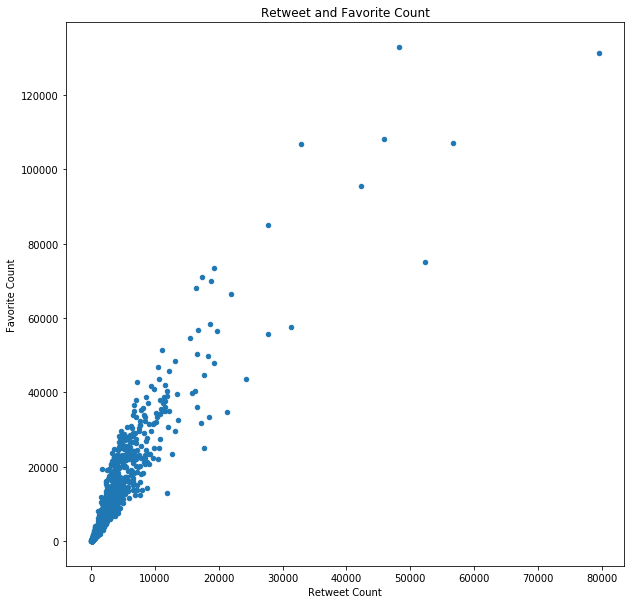

In [65]:
# create a scatter plot to see if there's a correlation between favorited tweets and retweets
df.plot(x = 'retweet_count', y = 'favorite_count', kind = 'scatter',  figsize = (10,10))
plt.title('Retweet and Favorite Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.savefig('retweet.png');

#### Insight 2:
The scatter plot shows there is a positive correlation between retweets and favorited tweets. In other words, the higher the number of retweets, the more it is being favorited. 

#### Question 3: What were the top ten predicted dog breeds through the neural network?

In [67]:
# sort the dog breeds from prediction_1 by their frequency
dog_breeds_count = df.prediction_1.value_counts()
dog_breeds_index = dog_breeds_count.sort_values(ascending = False)[:10].index
dog_breeds_values = dog_breeds_count.sort_values(ascending = False)[:10].values

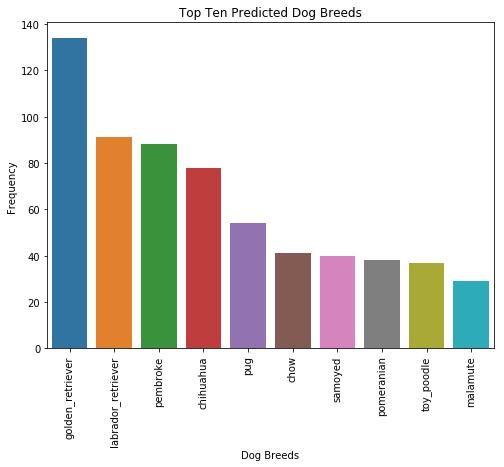

In [68]:
# create a bar chart to show the top ten most popular breeds
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = dog_breeds_index, y = dog_breeds_values)
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
plt.title('Top Ten Predicted Dog Breeds')
plt.ylabel('Frequency')
plt.xlabel('Dog Breeds')
plt.savefig('breeds.png');

#### Insight 3:
Based on the bar chart, Golden Retriever is the most frequently predicted breed, followed by labrador retriever. 